In [14]:
import numpy as np 
import os
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler ,EarlyStopping
from keras import backend as keras
from keras import models
from tensorflow.keras import layers

#custom
import tensorflow as tf

#from new tutorial
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

import random
import cv2
import tifffile as tiff

from PIL import Image ,ImageOps

import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

import warnings
import math

In [2]:
datapath = "/mnt/hgfs/VMsharedFolder/git/misc"
x_path = "/processed/val/images/"
y_path = "/processed/val/masks/"

#x_train1 = cv2.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif' ,1)
x_train0 = tiff.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif')
x_train = x_train0[:512 ,:512 ,:]
x_train = (x_train > 0).astype(np.int32)
x_train1 = tf.convert_to_tensor(x_train ,np.float32)
x_train2 = tf.expand_dims(x_train1, axis=-1)
y_train0 = np.load(datapath+y_path+'/991_mask.npy')
y_train1 = y_train0[:512 ,:512]
y_train = (y_train1 > 0).astype(np.int32)

print("x_train:")
print(x_train.dtype)
print(x_train.shape)
print(type(x_train))
print("\nx_train1:")
print(x_train1.dtype)
print(x_train1.shape)
print(type(x_train1))
print("\nx_train2:")
print(x_train2.dtype)
print(x_train2.shape)
print(type(x_train2))
print("\ny_train:")
print(y_train.dtype)
print(y_train.shape)
print(type(y_train))
print("\ny_train1:")
print(y_train1.dtype)
print(y_train1.shape)
print(type(y_train1))

img_size = x_train.shape
print(img_size)

x_train:
int32
(512, 512, 3)
<class 'numpy.ndarray'>

x_train1:
<dtype: 'float32'>
(512, 512, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>

x_train2:
<dtype: 'float32'>
(512, 512, 3, 1)
<class 'tensorflow.python.framework.ops.EagerTensor'>

y_train:
int32
(512, 512)
<class 'numpy.ndarray'>

y_train1:
uint8
(512, 512)
<class 'numpy.ndarray'>
(512, 512, 3)


In [91]:
x_train10 = x_train[: ,: ,:]
y_train10 = y_train[: ,:]
img_size10 = x_train10.shape
num_classes = 2
print(x_train10.shape)
print(y_train10.shape)

(512, 512, 3)
(512, 512)


In [16]:
datapath = "/mnt/hgfs/VMsharedFolder/git/misc"
x_path = "/npy"
y_path = "/masks"

input_imgs_path = datapath + x_path
target_imgs_path = datapath + y_path

x=[]
y=[]

#tempxx = np.load(datapath+'/image_file_14.npy')
#tempxx = np.load(datapath+'/label_file_14.npy')

input_img_paths = sorted(
    [
        os.path.join(input_imgs_path ,fname)
        for fname in os.listdir(input_imgs_path)
        if fname.endswith(".npy")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_imgs_path, fname)
        for fname in os.listdir(target_imgs_path)
        if fname.endswith(".npy") and not fname.startswith(".")
        
    ]
)

for npy in input_img_paths:
    x.append(np.load(npy))
    print(npy)

for npy in target_img_paths:
    y.append(np.load(npy))
    print(npy)
    
x = np.array(x)
y = np.array(y)
#x = x [: ,:512 ,:512 ,:]
#y = y[: ,:512 ,:512]

img_size = x_train[0][0].shape
print(x.shape)
print(y.shape)

/mnt/hgfs/VMsharedFolder/git/misc/npy/image_file_14.npy
/mnt/hgfs/VMsharedFolder/git/misc/npy/image_file_84.npy
/mnt/hgfs/VMsharedFolder/git/misc/masks/label_file_14.npy
/mnt/hgfs/VMsharedFolder/git/misc/masks/label_file_84.npy
(2, 32, 512, 512, 3)
(2, 32, 512, 512, 1)


In [128]:
print(x[0][4].shape)
print(y[0][4].shape)

(512, 512, 3)
(512, 512, 1)


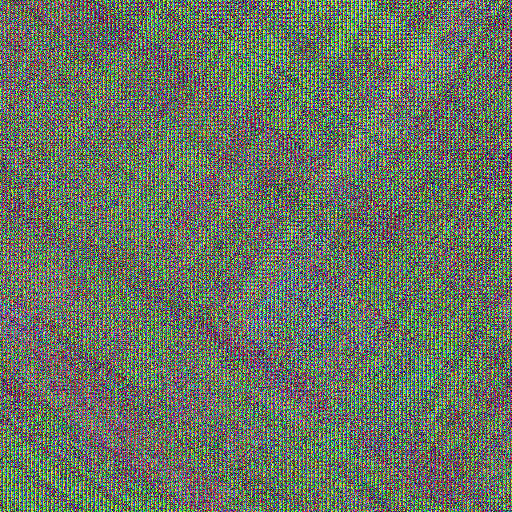

In [119]:
Image.fromarray(x[0][4] ,'RGB')

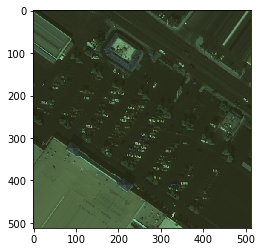

In [108]:
plt.imshow(x[0][4])

In [149]:
print(y[0].shape)
print(y[0][:2].shape)
print(y[0][4 ,: ,: ,0].shape)

(32, 512, 512, 1)
(2, 512, 512, 1)
(512, 512)


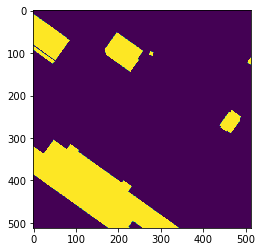

In [152]:
plt.imshow(y[0][4 ,: ,: ,0])

num_classes = 2
batch_size = 2

input_img_paths = datapath + x_path
target_dir = datapath + y_path

input_img_paths = sorted(
    [
        os.path.join(input_img_paths ,fname)
        for fname in os.listdir(input_img_paths)
       # if fname.endswith(".jpg")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
       # if fname.endswith(".png") and not fname.startswith(".")
        
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:10], target_img_paths[:10]):
    print(input_path, "|", target_path)
    x_train = tiff.imread(datapath+'/RGB-PanSharpen_AOI_2_Vegas_img991.tif')

from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

# Display input image #7
display(Image(filename=input_img_paths[2]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[2]))
display(img)

from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            y[j] -= 1
        return x, y

In [24]:
def get_model(img_size = (512,512,3) ,num_classes=1 ,filter_sizes=[64, 128, 256]):
    #inputs = keras.Input(shape=img_size + (3,))
    inputs = Input(shape=img_size)

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in filter_sizes:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###
    filter_sizes.reverse()
    filter_sizes.append(32)
    
    for filters in filter_sizes:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    if num_classes==1:
        outputs = layers.Conv2D(filters=num_classes, kernel_size=3, activation="sigmoid", padding="same")(x)
    else:
        outputs = layers.Conv2D(filters=num_classes, kernel_size=3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
#model = get_model((650,650,3), num_classes)
#changes this to load only most recent h5 file, not just _e05.h5
model_path = "/mnt/hgfs/VMsharedFolder/git/misc/model_checkpoint_unet3_e05.h5"
num_classes = 1

if os.path.isfile(model_path) & False:
    unet = keras.models.load_model(model_path)
    unet.summary()
    print("loaded model from file")
else:
    unet = get_model(num_classes=num_classes)
    unet.summary()
    print("loaded model from code")
    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Split our img paths into a training and a validation set
val_samples = 2
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [7]:
train_size = 4
x_train = x[0 ,train_size:]
x_val = x[0 ,:train_size]
y_train = y[0 ,train_size:] 
y_val = y[0 ,:train_size]
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(28, 512, 512, 3)
(4, 512, 512, 3)
(28, 512, 512, 1)
(4, 512, 512, 1)


# fit_generator is depreciated. might not need flow_from directory, since we're outputting npy arrays

/mnt/hgfs/VMsharedFolder/git/misc/processed/val/images/"
/mnt/hgfs/VMsharedFolder/git/misc/processed/val/masks/"

input_img_paths

In [8]:
input_imgs_path

'/mnt/hgfs/VMsharedFolder/git/misc/npy'

batch_sz = 2
train_datagen = ImageDataGenerator(
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
       # horizontal_flip=True
        )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        input_imgs_path,
        target_size=img_size,
        batch_size=2,
        #class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
        target_imgs_path,
        target_size=img_size,
        batch_size=1,
        class_mode='binary'
)

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=test_generator,
        validation_steps=800)

# end of fit_generator alternative code

In [19]:
# initialize the number of epochs and batch size
EPOCHS = 5
BS = 4

if num_classes==1:
    #unet.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
    unet.compile(optimizer="rmsprop"
                 ,loss="binary_crossentropy"
                 ,metrics=['accuracy']
                # ,monitor = ['val_acc','val_loss']
                #,monitor = 'val_accuracy'
                )
    print("binary")
else:
    #unet.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
    unet.compile(optimizer="rmsprop"
                 ,loss="sparse_categorical_crossentropy"
                 ,metrics=['accuracy']
                # ,monitor = ['val_acc','val_loss']
                #,monitor = 'val_accuracy'
                )
    print("categorical")
#saves model every 2 epochs (periods)
model_andor_weight_path = "/mnt/hgfs/VMsharedFolder/git/misc/"
model_andor_weight_path = "/mnt/hgfs/VMsharedFolder/git/misc/"
model_checkpoint=ModelCheckpoint(filepath = model_andor_weight_path+'model_checkpoint_unet3_e{epoch:02d}.h5'
                                                    ,save_freq = 'epoch'
                                                    ,verbose = 1
                                                    ,save_weights_only = False
                                                    ,save_best_only = True)
earlystop = EarlyStopping(monitor='accuracy'
                         ,min_delta = .01
                         ,patience=3)

binary


In [20]:
input_imgs_path = "/mnt/hgfs/VMsharedFolder/git/misc/npy"
target_img_paths = "/mnt/hgfs/VMsharedFolder/git/misc/masks"
print(input_imgs_path)
print(target_img_paths)

/mnt/hgfs/VMsharedFolder/git/misc/npy
/mnt/hgfs/VMsharedFolder/git/misc/masks


In [303]:
def npy_generator(path ,print_flag=0):
    #for i in np.arange(npy_len):
    for fname in sorted(os.listdir(path)):
        if fname.endswith(".npy"):
            print("npy: " ,fname)
            yield fname
            
def masks_generator(path ,npy_len=2):
    #for i in np.arange(npy_len):
    for fname in sorted(os.listdir(path)):
        if fname.endswith(".npy"):  
            print("masks: " ,fname)
            yield fname

In [314]:
def npy_generator(path ,print_flag=0):
    #for i in np.arange(npy_len):
    for fname in sorted(os.listdir(path)):
        if fname.endswith(".npy"):
            #print(fname)
            yield np.load(path+"/"+fname)
            
def masks_generator(path ,npy_len=2):
    #for i in np.arange(npy_len):
    for fname in sorted(os.listdir(path)):
        if fname.endswith(".npy"):  
            #print(fname)
            yield np.load(path+"/"+fname)

In [315]:
def xy_generator():
    for item1 ,item2 in zip(npy_generator(path=input_imgs_path ,print_flag=1) 
                            ,masks_generator(path=target_img_paths)):
        yield(item1 ,item2)
        #print(item1 ,"|",item2 ,"/")

In [1]:
npy_generator(path=input_imgs_path ,print_flag=1)

NameError: name 'npy_generator' is not defined

In [283]:
masks_generator(path=target_img_paths)

label_file_14.npy
label_file_84.npy


In [316]:
xy_generator()

<generator object xy_generator at 0x7ff30f51c5f0>

In [22]:
len(x_train)

28

In [21]:
if False:
    print("looping")
    for i in np.arange(0,6): #essentially continues training starting from previous epochs saved weights
        H = unet.fit( x=x_train, y=y_train
                  ,batch_size=BS
                  ,validation_data=(x_val, y_val)
                  ,steps_per_epoch=len(x_train) // BS
                  ,callbacks=[model_checkpoint ,earlystop]
                  ,epochs=EPOCHS)
else:
    print("not looping")
    H = unet.fit( x=x_train, y=y_train
              ,batch_size=BS
              ,validation_data=(x_val, y_val)
              ,steps_per_epoch=len(x_train) // BS
              ,callbacks=[model_checkpoint ,earlystop]
              ,epochs=EPOCHS)

not looping
Epoch 1/5
7/7 [==============================] - 26s 3s/step - loss: 0.8686 - accuracy: 0.6118 - val_loss: 0.0664 - val_accuracy: 0.8490

Epoch 00001: val_loss improved from inf to 0.06639, saving model to /mnt/hgfs/VMsharedFolder/git/misc/model_checkpoint_unet3_e01.h5
Epoch 2/5
7/7 [==============================] - 22s 3s/step - loss: 0.0209 - accuracy: 0.8183 - val_loss: 0.0054 - val_accuracy: 0.8490

Epoch 00002: val_loss improved from 0.06639 to 0.00542, saving model to /mnt/hgfs/VMsharedFolder/git/misc/model_checkpoint_unet3_e02.h5
Epoch 3/5
7/7 [==============================] - 22s 3s/step - loss: 0.0362 - accuracy: 0.8075 - val_loss: 0.0052 - val_accuracy: 0.8490

Epoch 00003: val_loss improved from 0.00542 to 0.00515, saving model to /mnt/hgfs/VMsharedFolder/git/misc/model_checkpoint_unet3_e03.h5
Epoch 4/5
7/7 [==============================] - 23s 3s/step - loss: 0.0292 - accuracy: 0.7815 - val_loss: 0.0053 - val_accuracy: 0.8490

Epoch 00004: val_loss did not im

# use this eventually
weight_path = "/mnt/hgfs/VMsharedFolder/git/misc/"
model_json = model.to_json()
with open("model_weights.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(weight_path+"model_weights_unet1.hf5")
print("Saved model to disk")

save_model_weights_hdf5(model, weight_path, overwrite = TRUE)

In [14]:
y_train[2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
print(type(y_train[2]))
print(y_train[2].shape)

<class 'numpy.ndarray'>
(512, 512, 1)


In [47]:
y_train[2][: ,: ,0].shape

(512, 512)

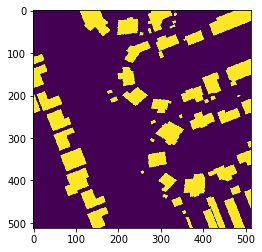

In [20]:
plt.imshow(y_train[2][: ,: ,0])

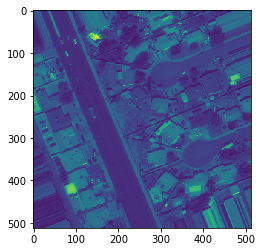

In [45]:
plt.imshow(x_train[2][: ,: ,0])

def display_mask(i ,temp_pred):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(temp_pred, axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)

display_mask(0 ,temp_pred)

(512, 512, 3)
temp1 (1, 512, 512, 3)
pred2 (1, 512, 512, 1)
pred3 (512, 512, 1)


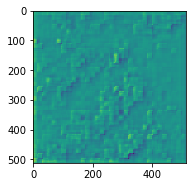

In [25]:
idx = 30
temp = x[0][idx ,: ,: ,:]
print(temp.shape)
#temp = np.expand_dims(x[idx] ,axis=0)
#temp = x_train[idx]
temp = np.expand_dims(temp ,axis=0)
print("temp1" ,temp.shape)

def axis_i(arr, axis, i):
    idx = (np.s_[:],) * axis + (i,)
    return arr[idx]

temp_pred = np.array(unet.predict(temp))
#temp_pred = activation_model.predict(temp)
print("pred2" ,temp_pred.shape)
temp_pred = axis_i(temp_pred ,0 ,0)
print("pred3" ,temp_pred.shape)

#print(temp_pred)
for i in np.arange(0 ,temp_pred[-1].shape[1]):
    plt.figure().add_subplot(1 ,2 ,i+1)
    plt.imshow(temp_pred[:,:,i])

# of layers  72

pred shape: (1, 512, 512, 1)
conv2d_8


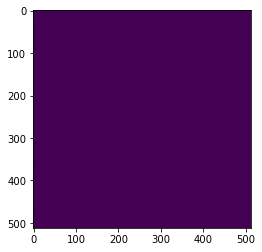

In [73]:
#proving that the model has been copied over
# Returns a list of arrays: one array per layer activation
temp_pred = activation_model.predict(temp)
print("# of layers " ,len(temp_pred))

# One activation layer example as numpy array
layer_idx = 71
print("\npred shape:" ,temp_pred[layer_idx].shape)
channel_idx = 0
plt.imshow(temp_pred[layer_idx][0,:,: ,0] )
print(activation_model.layers[layer_idx].name)

In [15]:
#copies all layers of model
activation_layers = [layer.output for layer in unet.layers[:]]
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=unet.input, outputs=activation_layers)
# Returns a list of five Numpy arrays: one array per layer activation
activation_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [108]:
len(temp_pred)

72

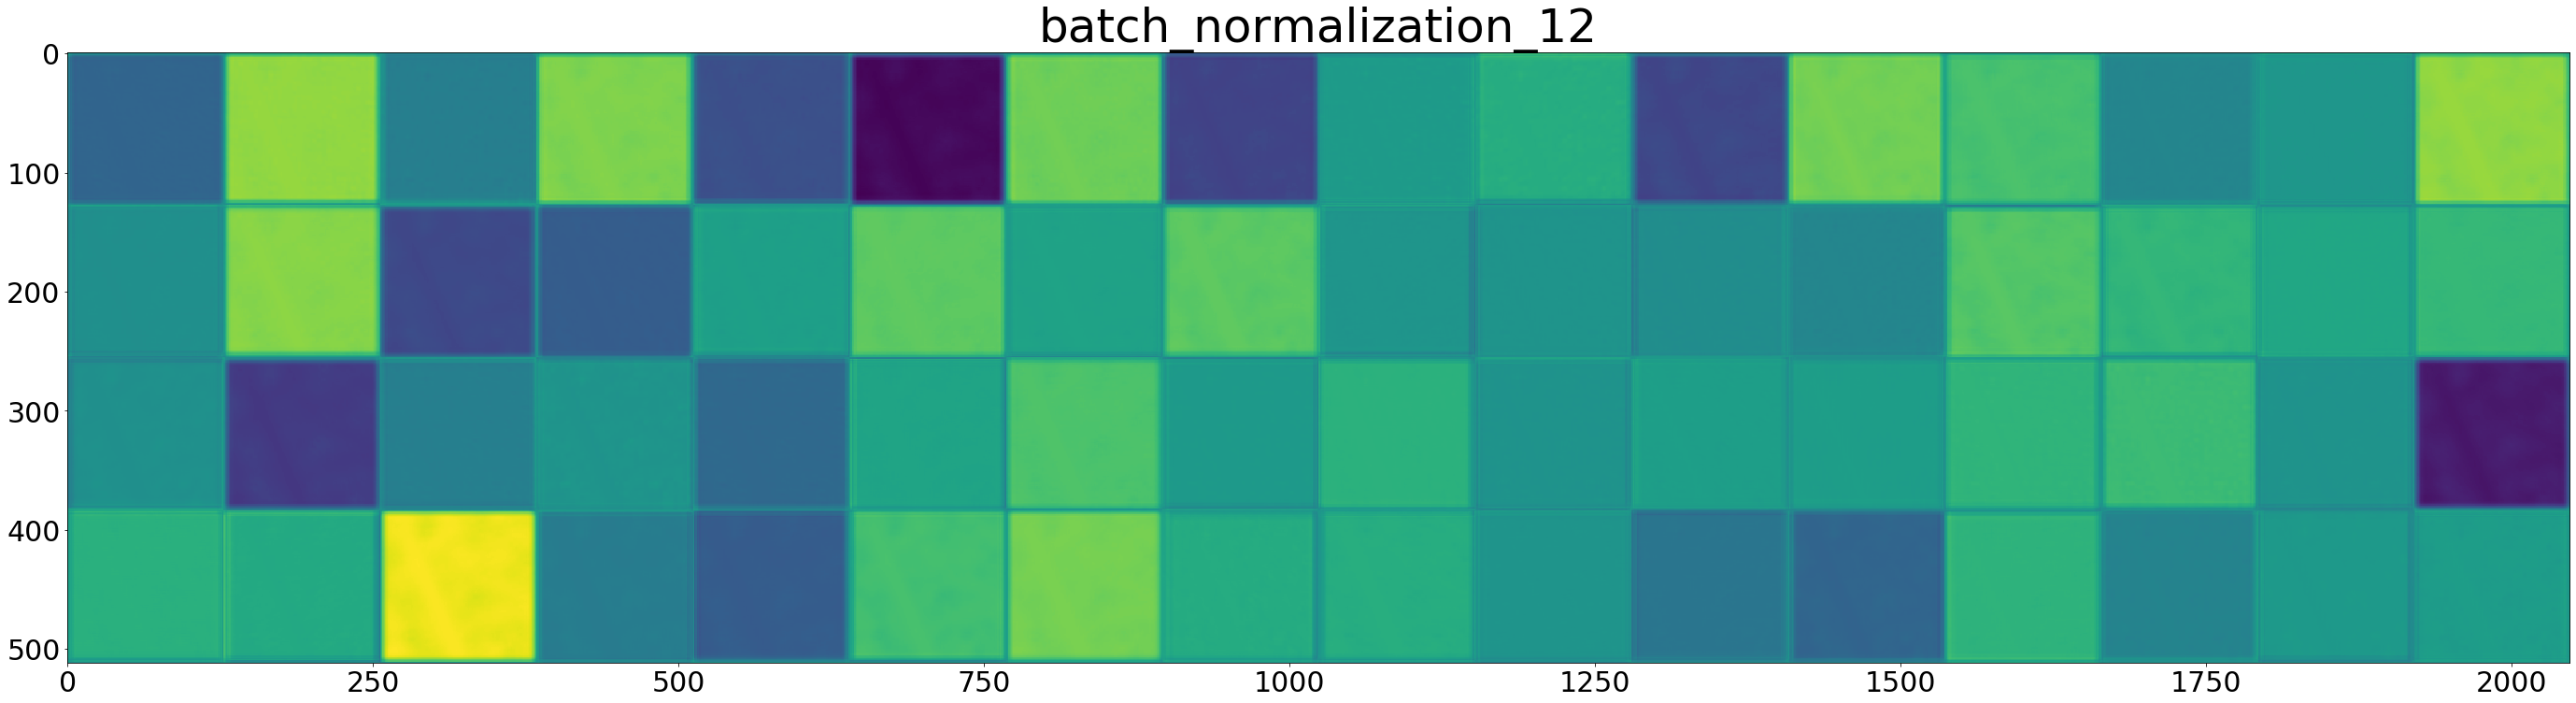

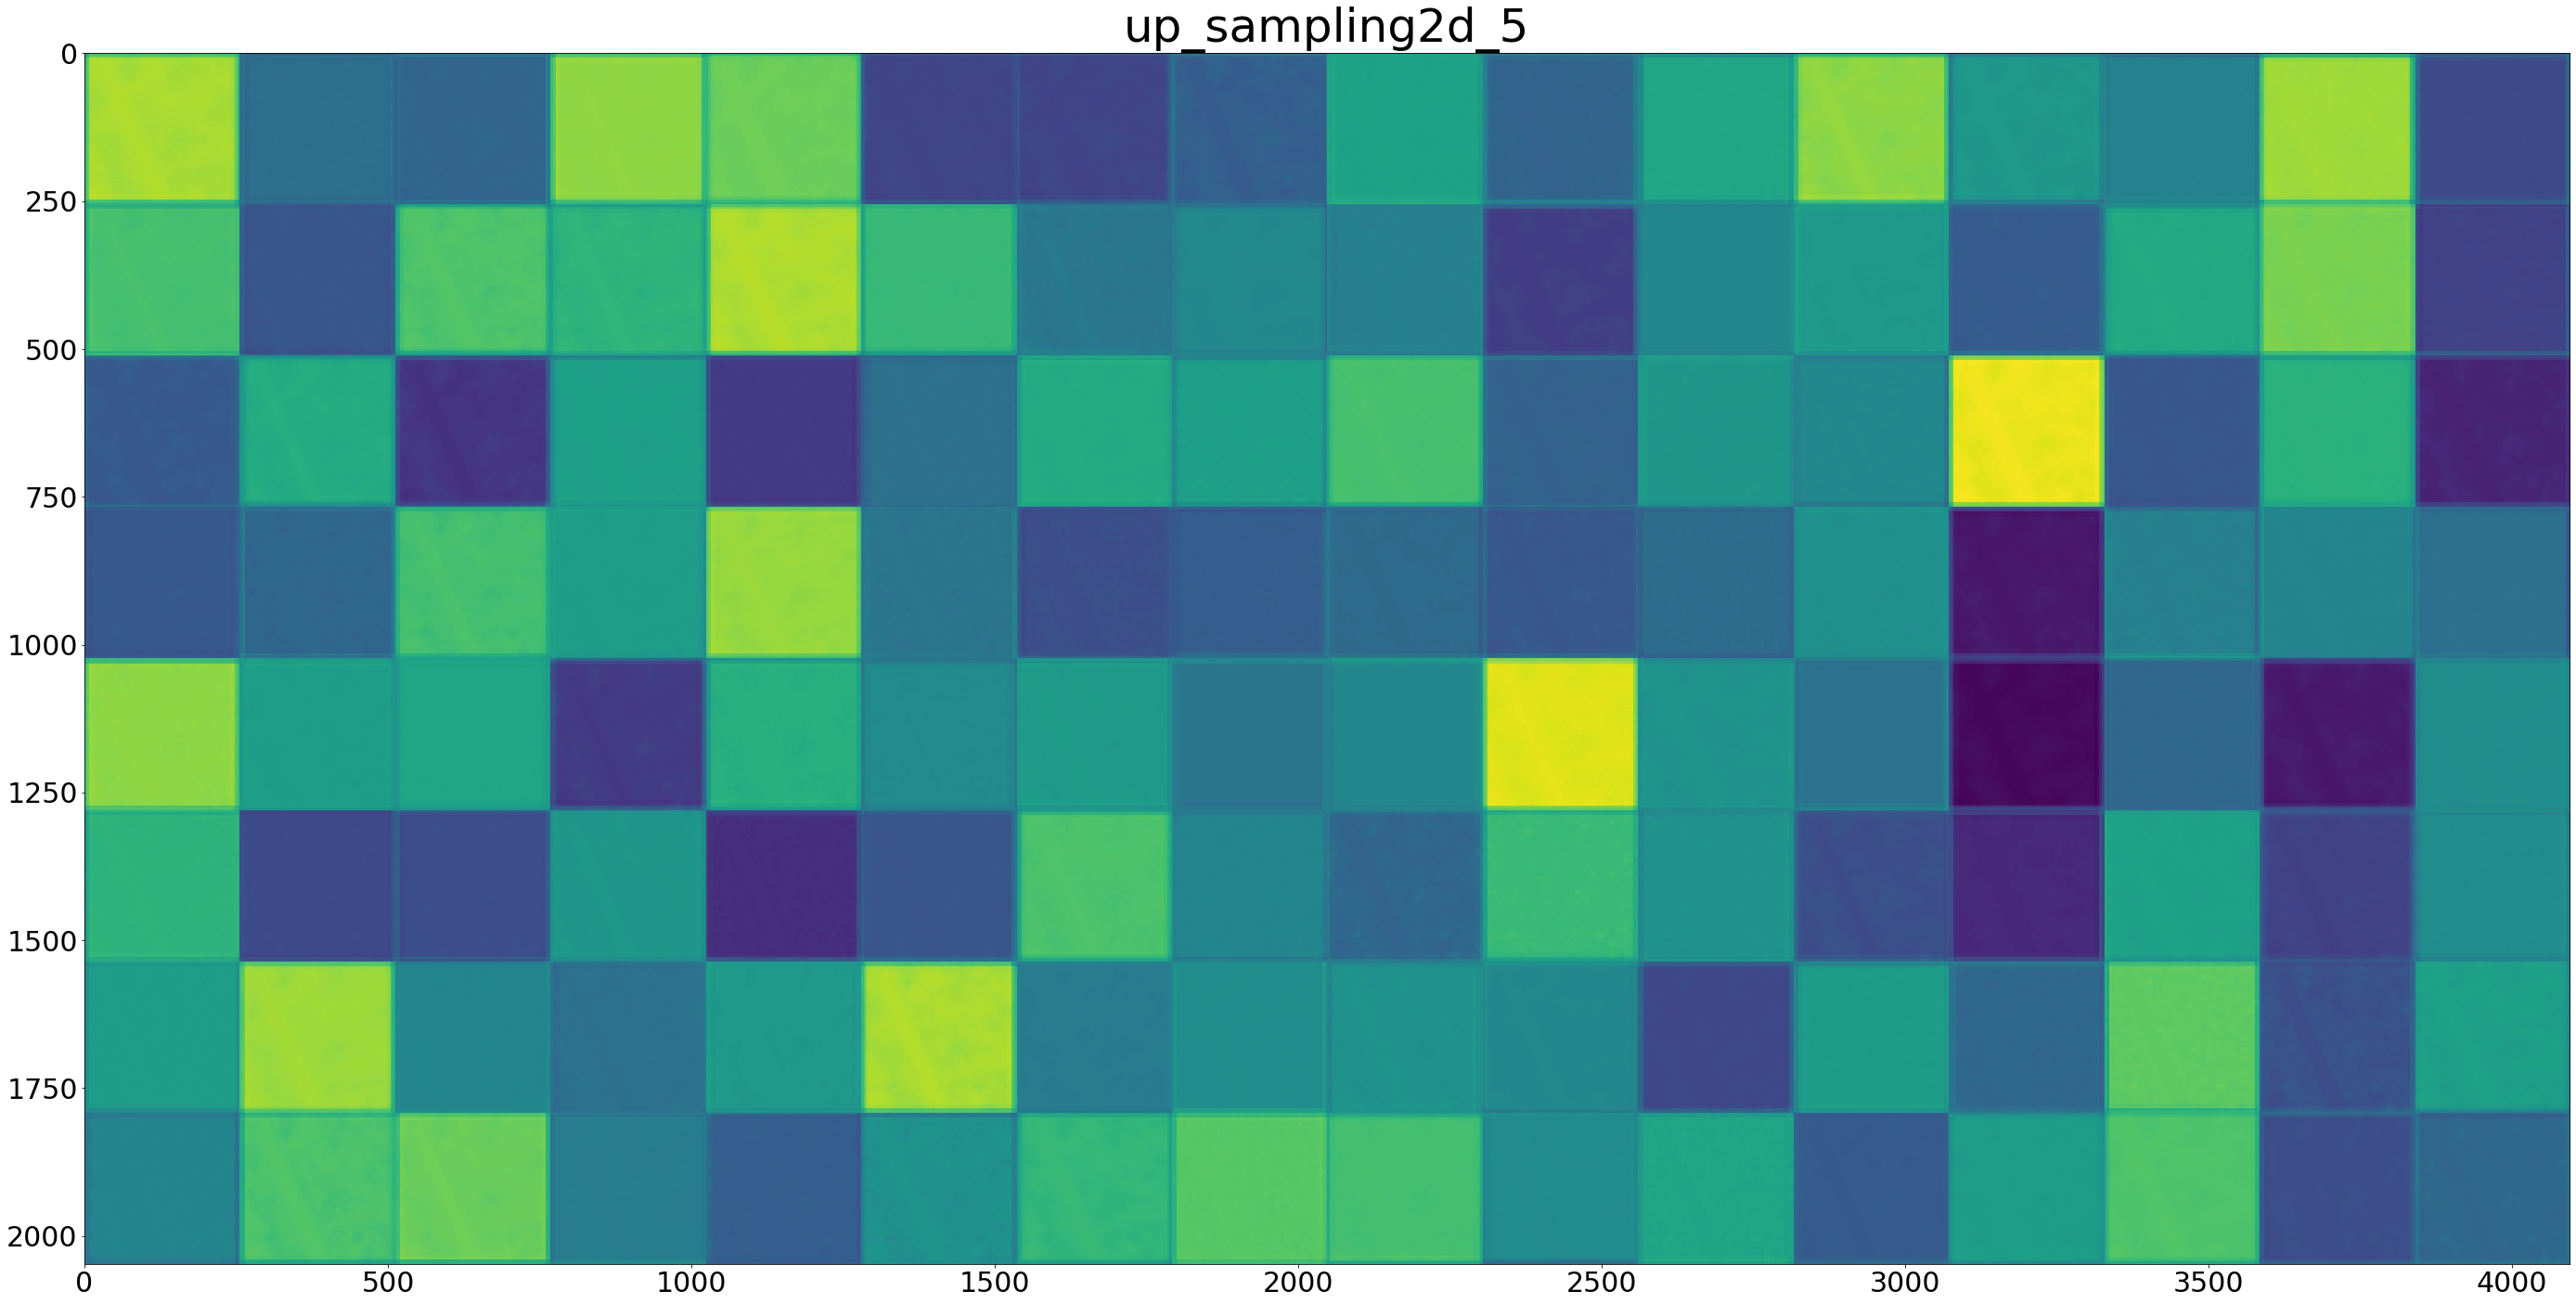

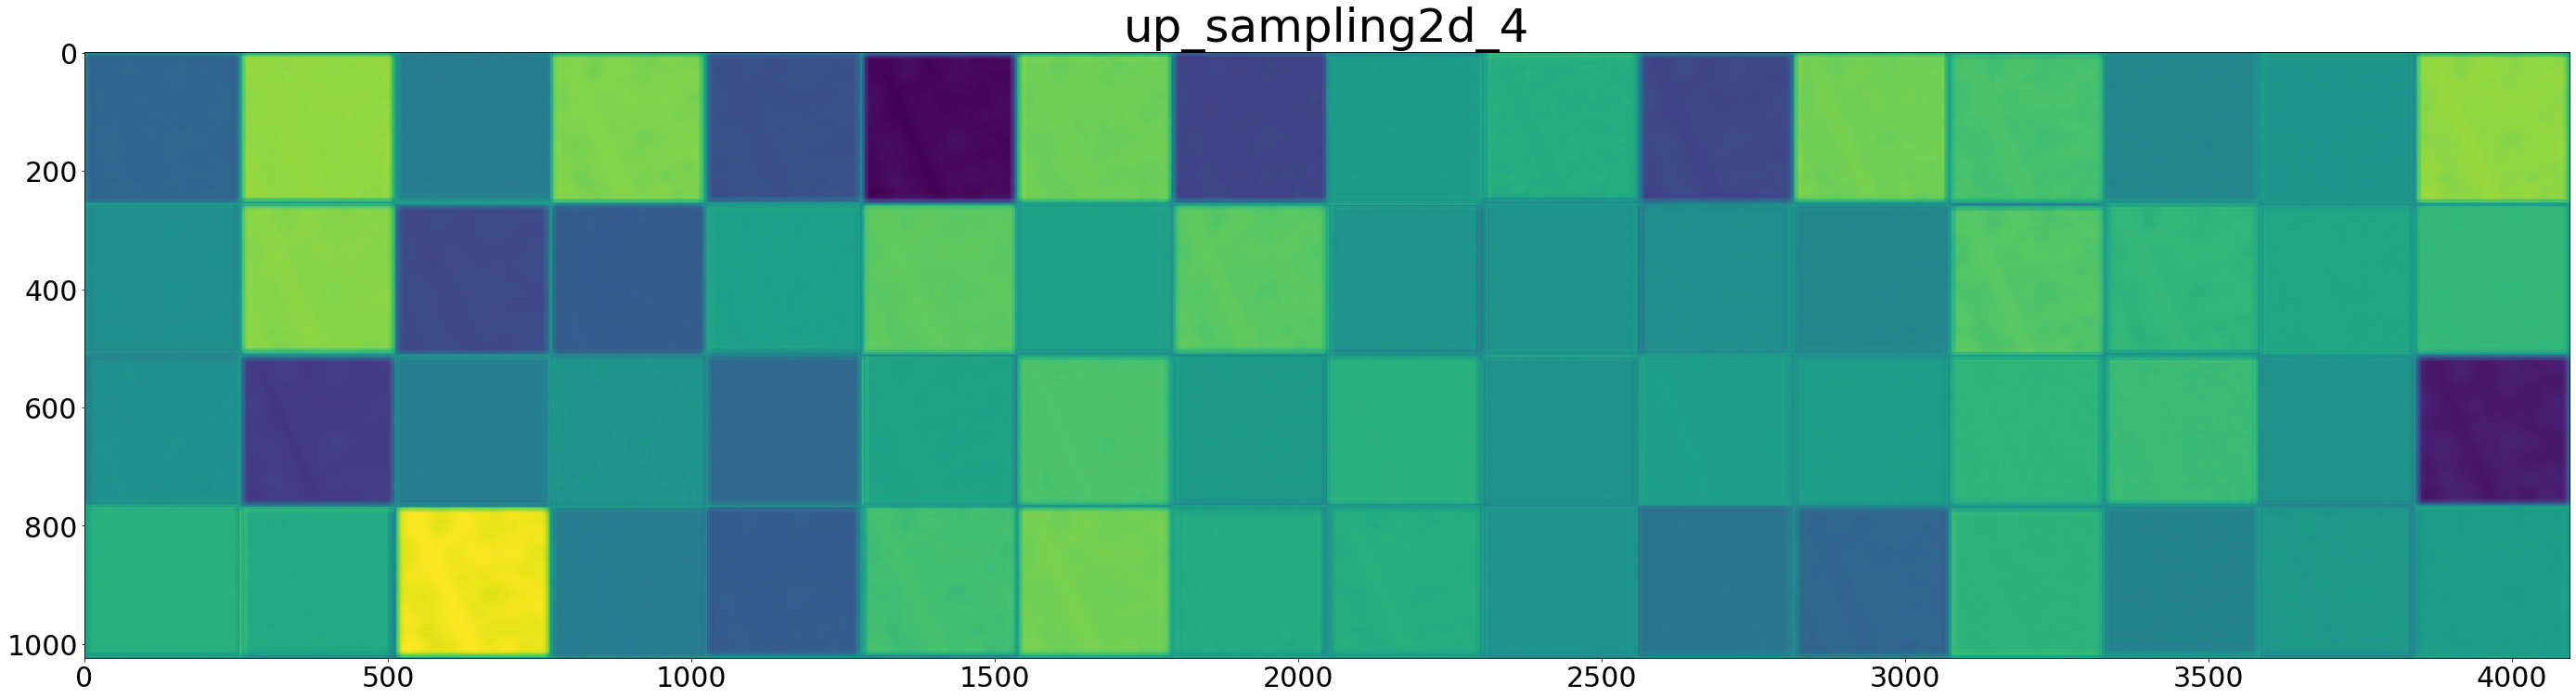

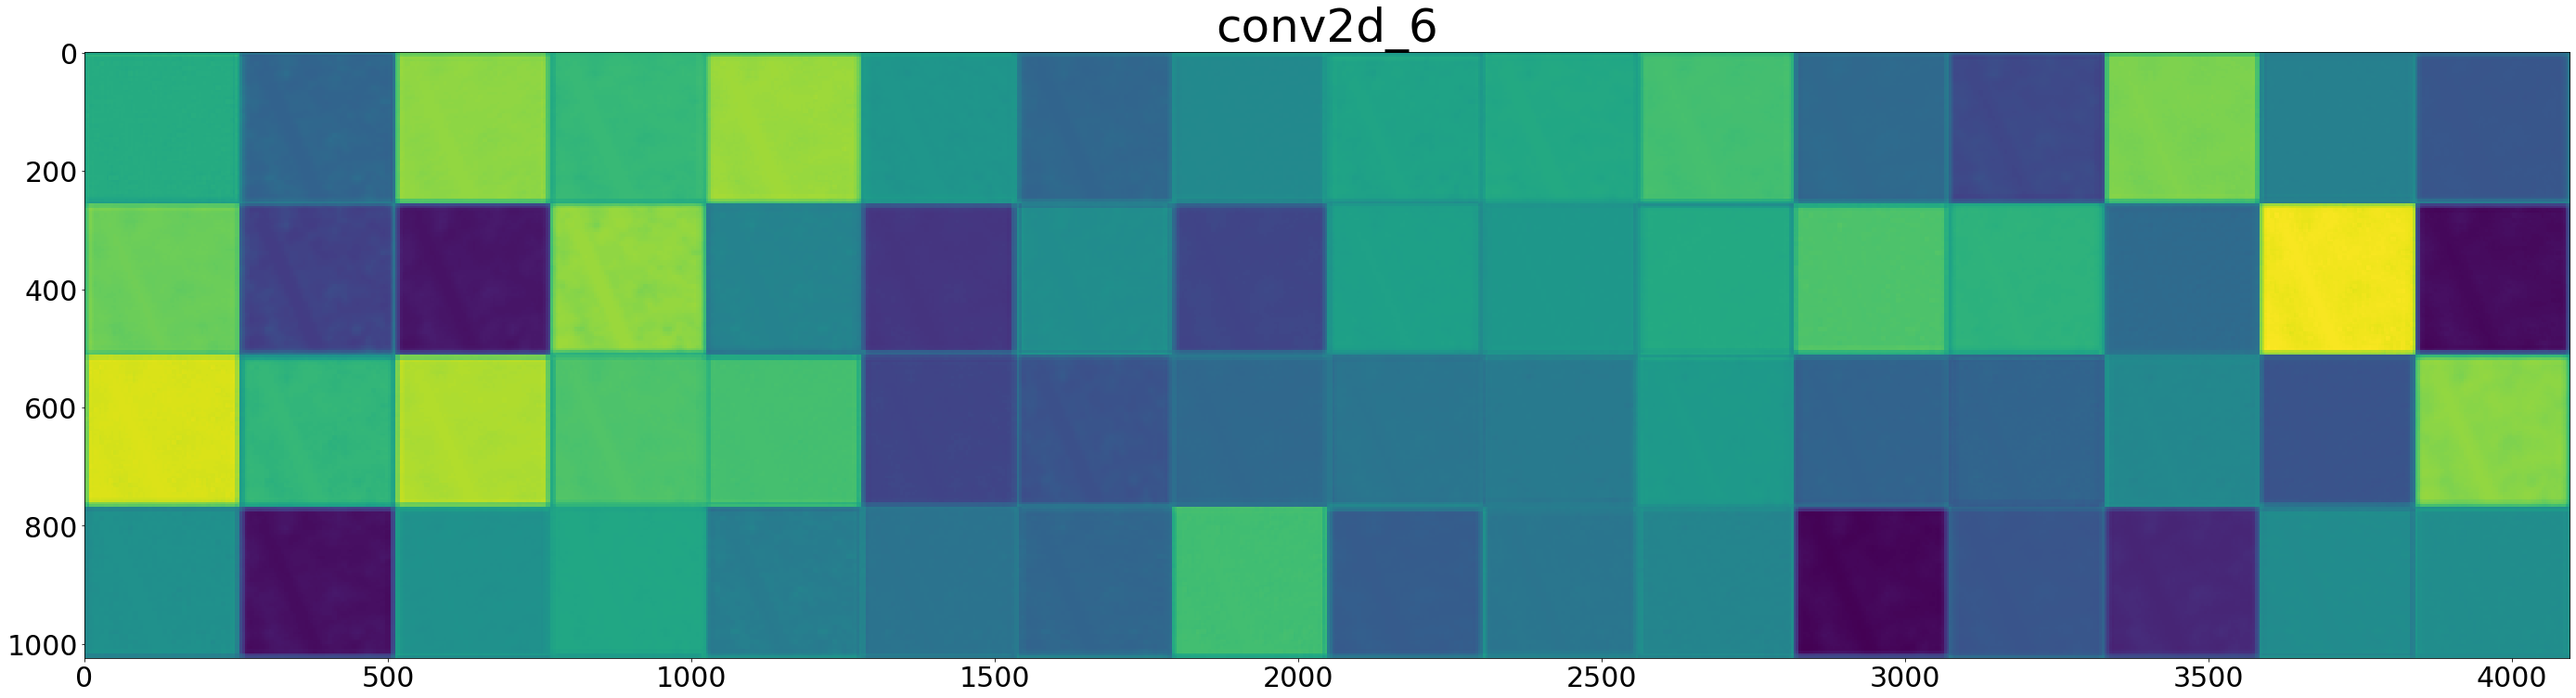

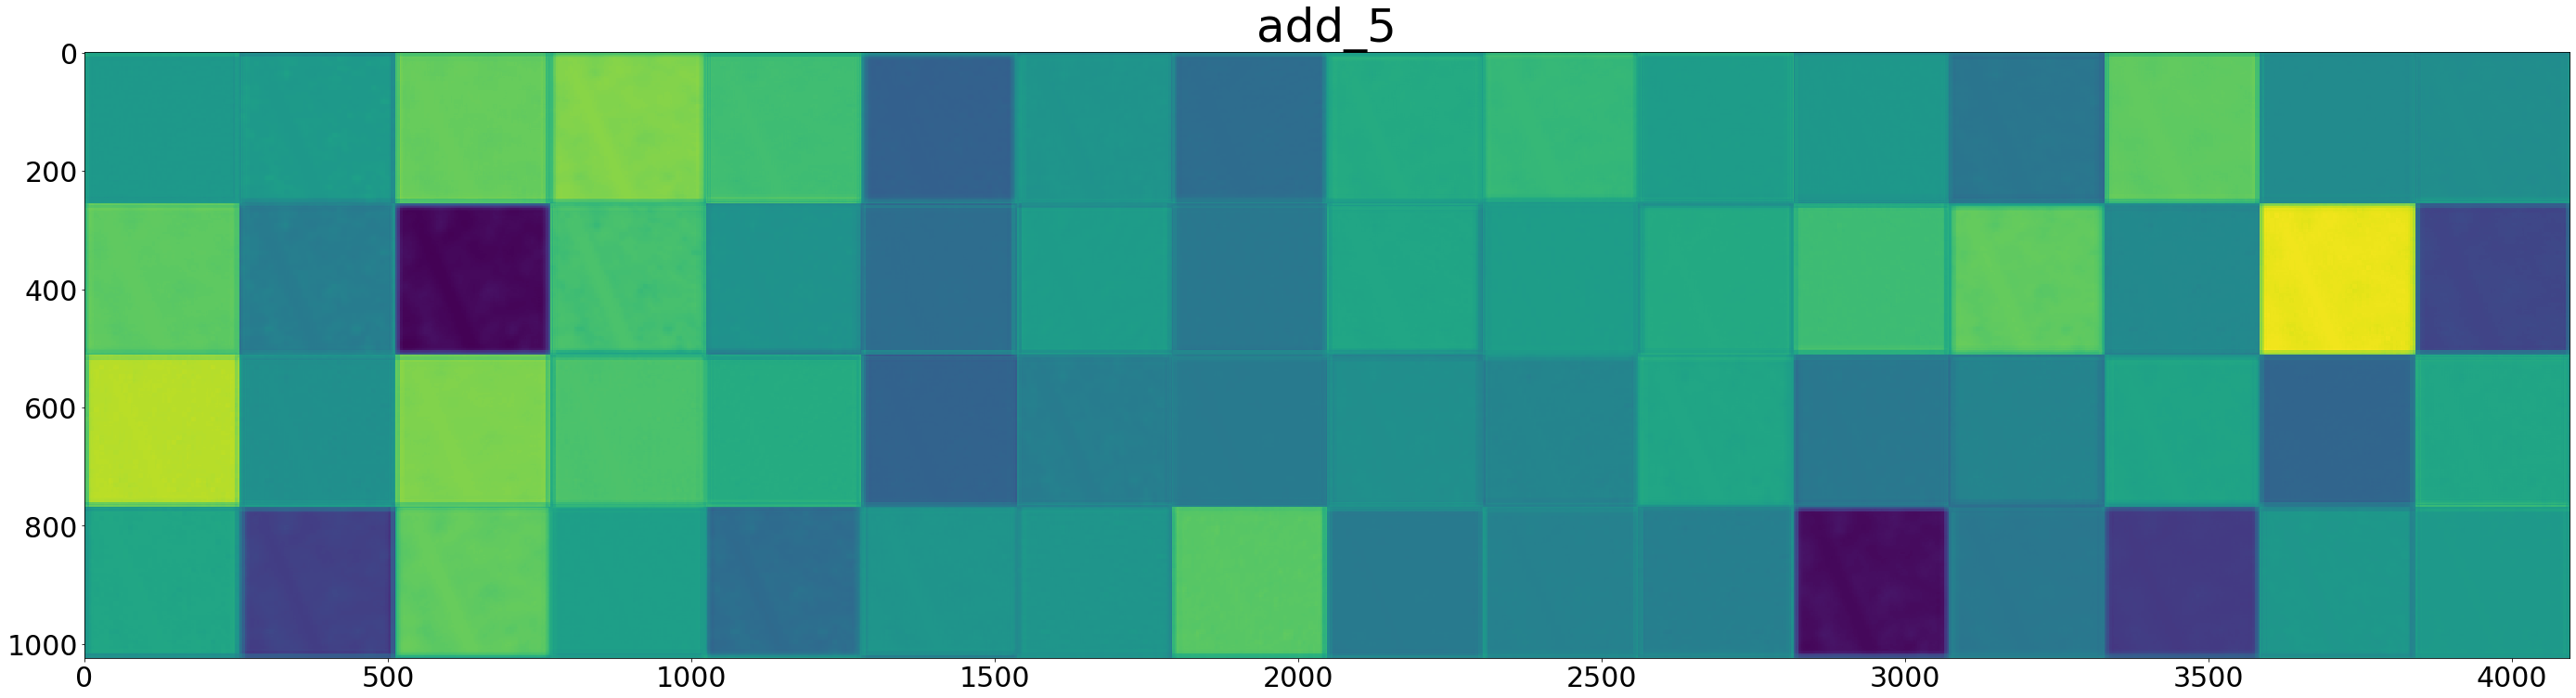

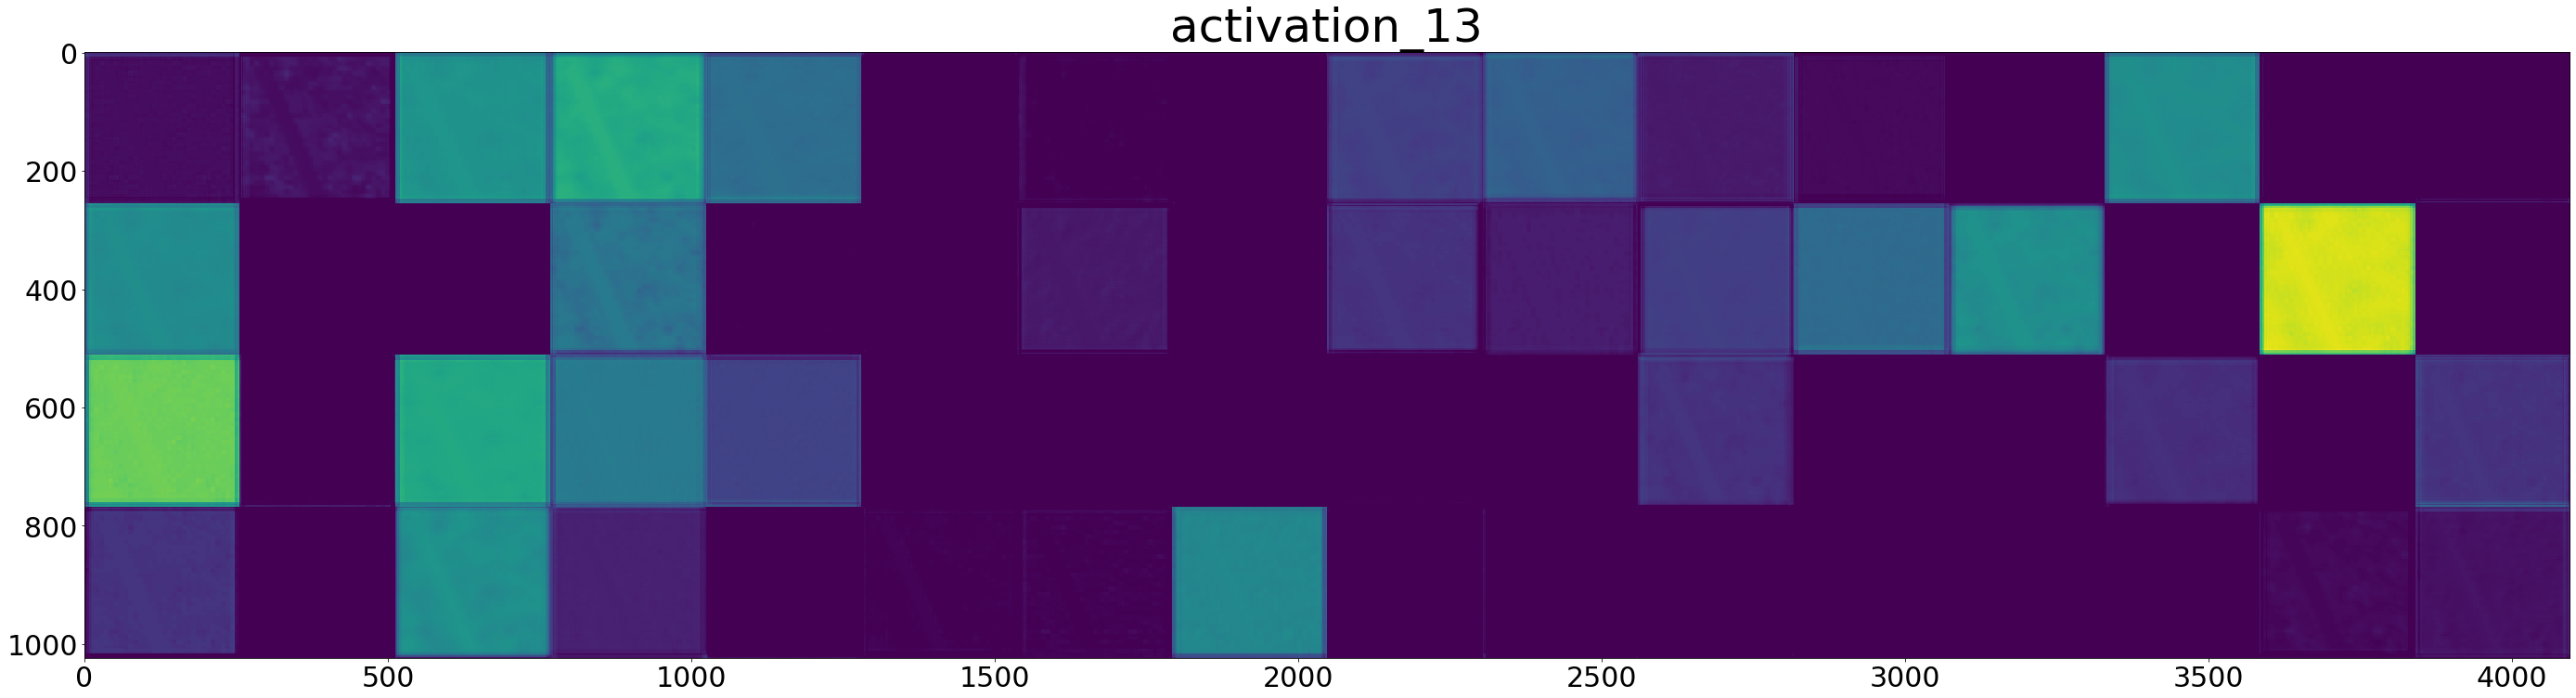

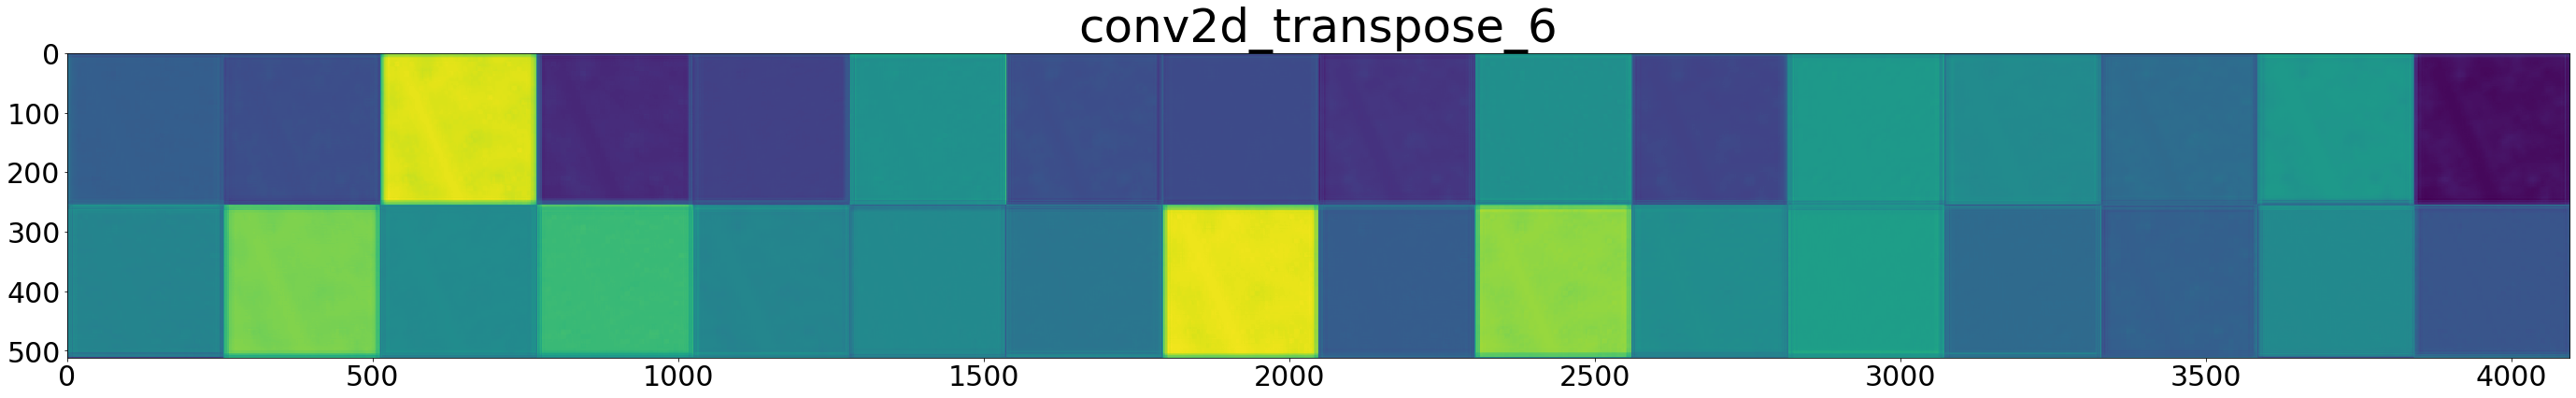

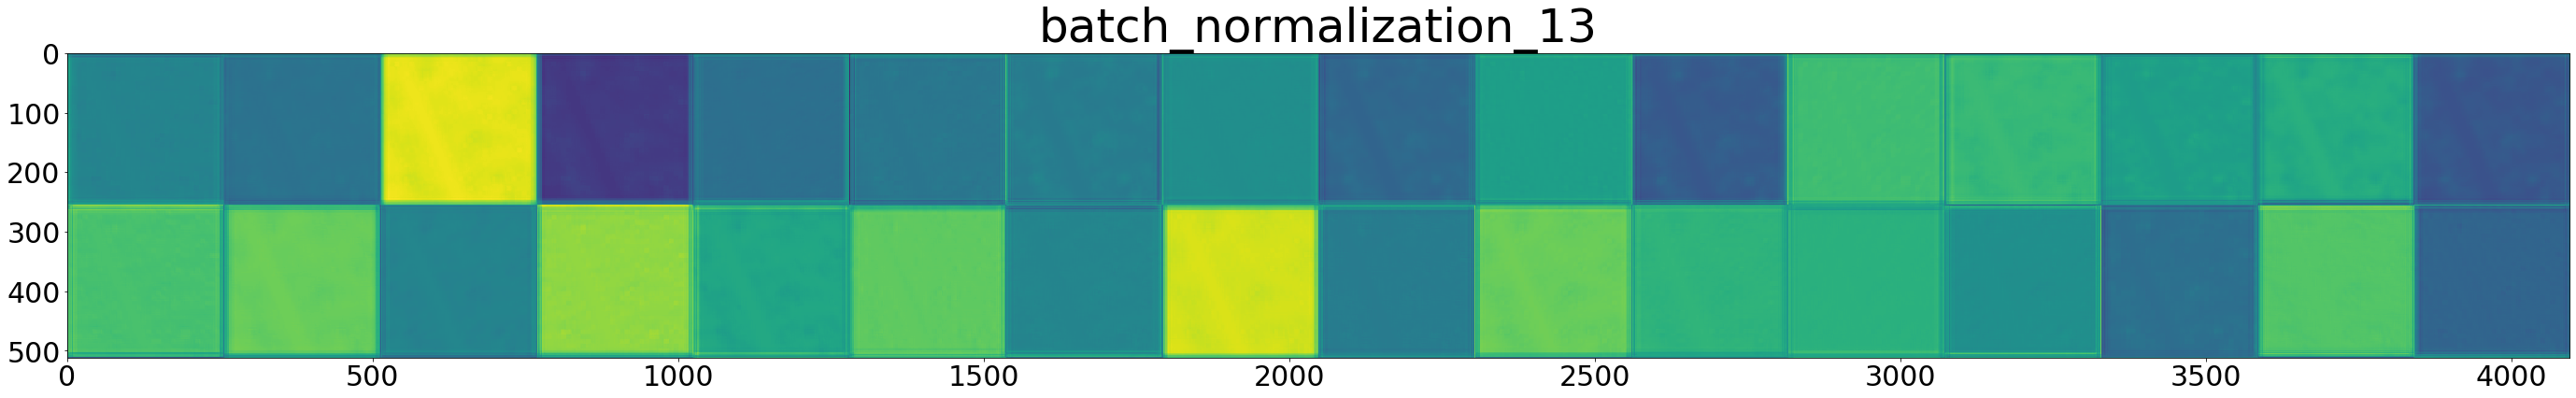

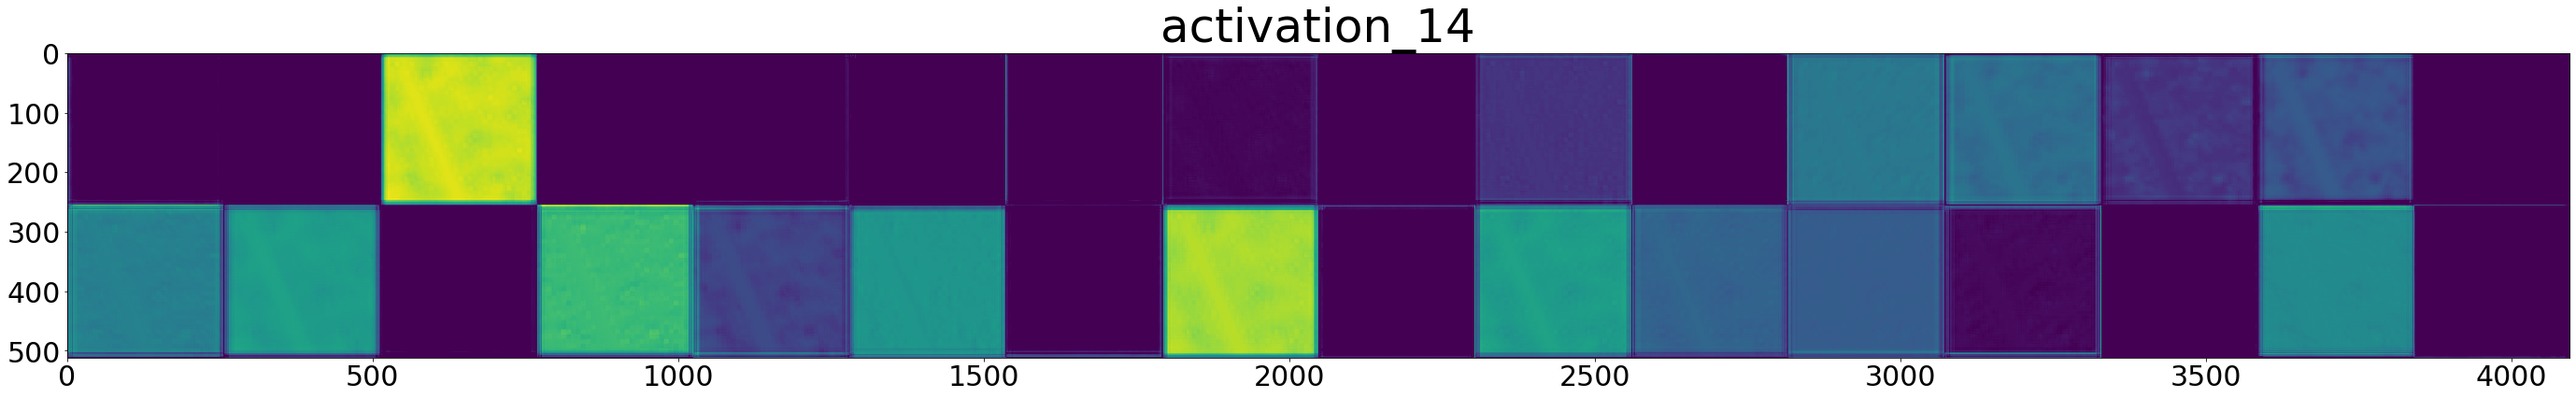

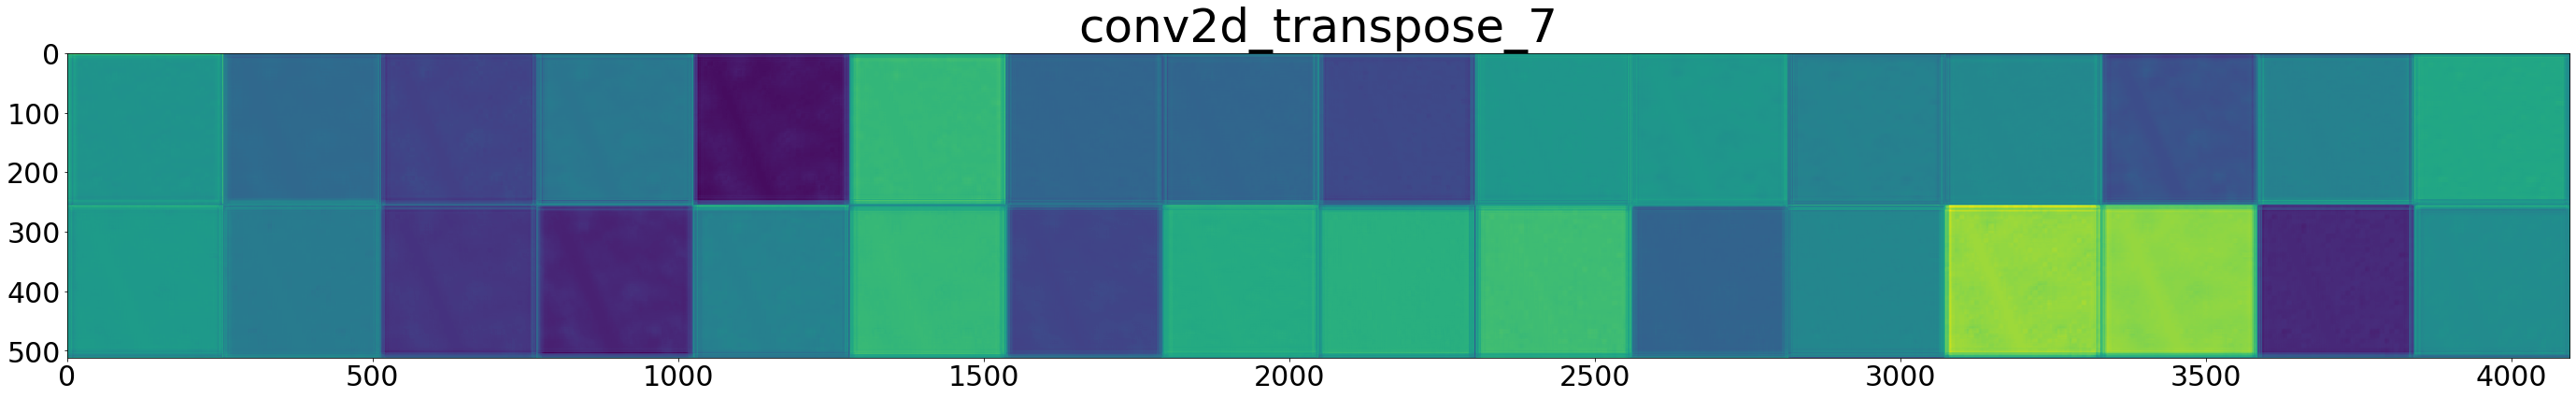

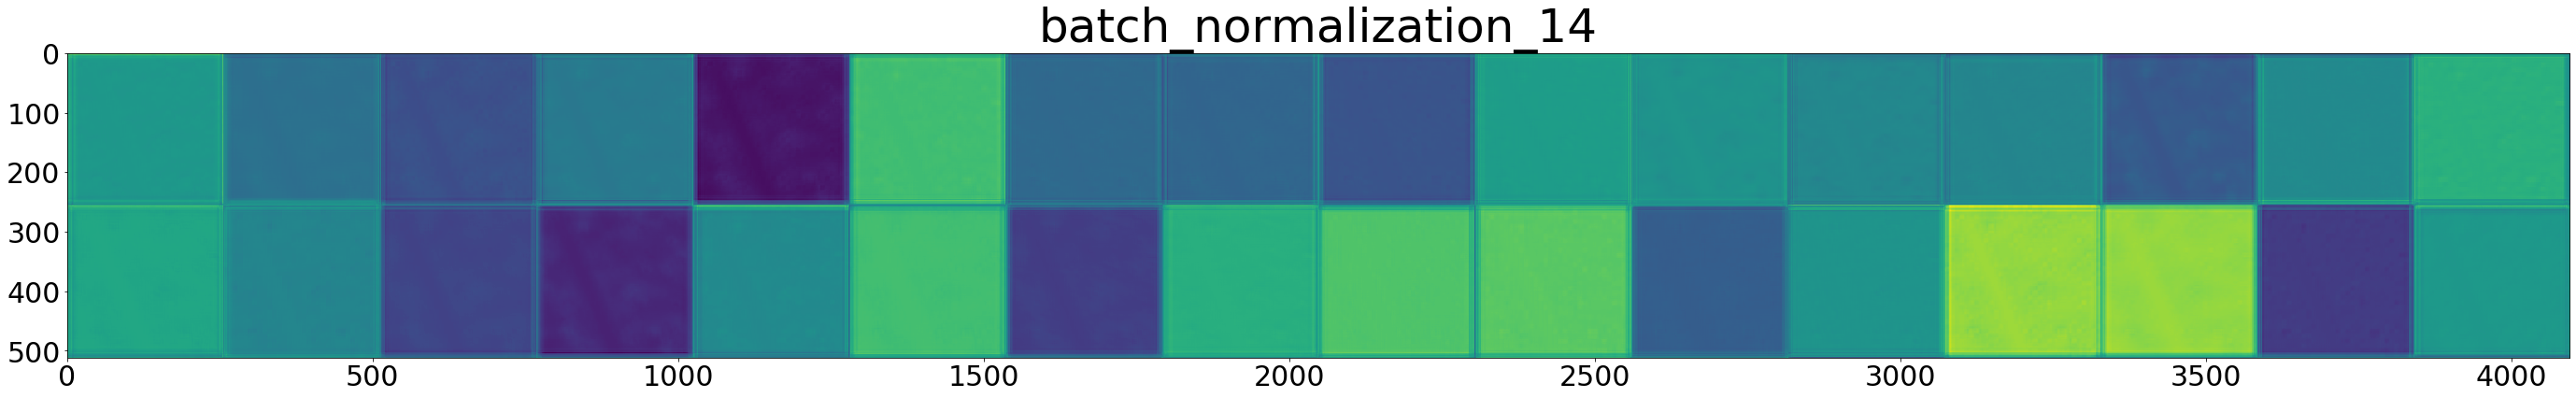

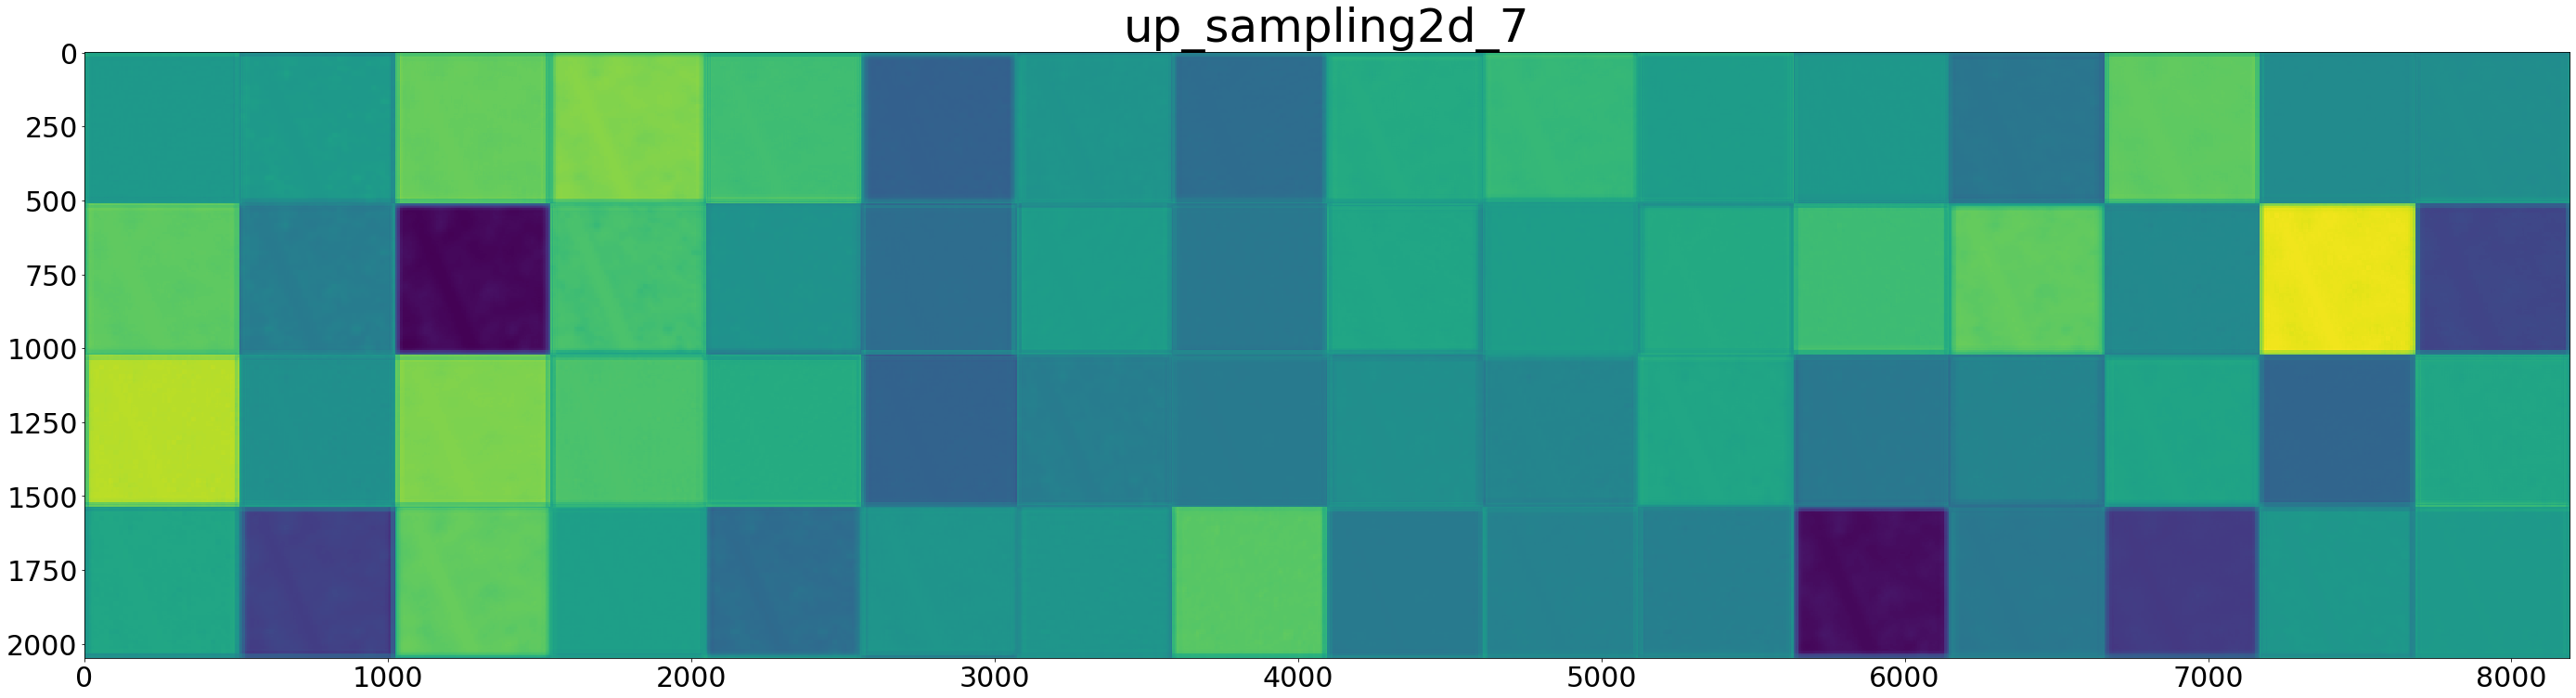

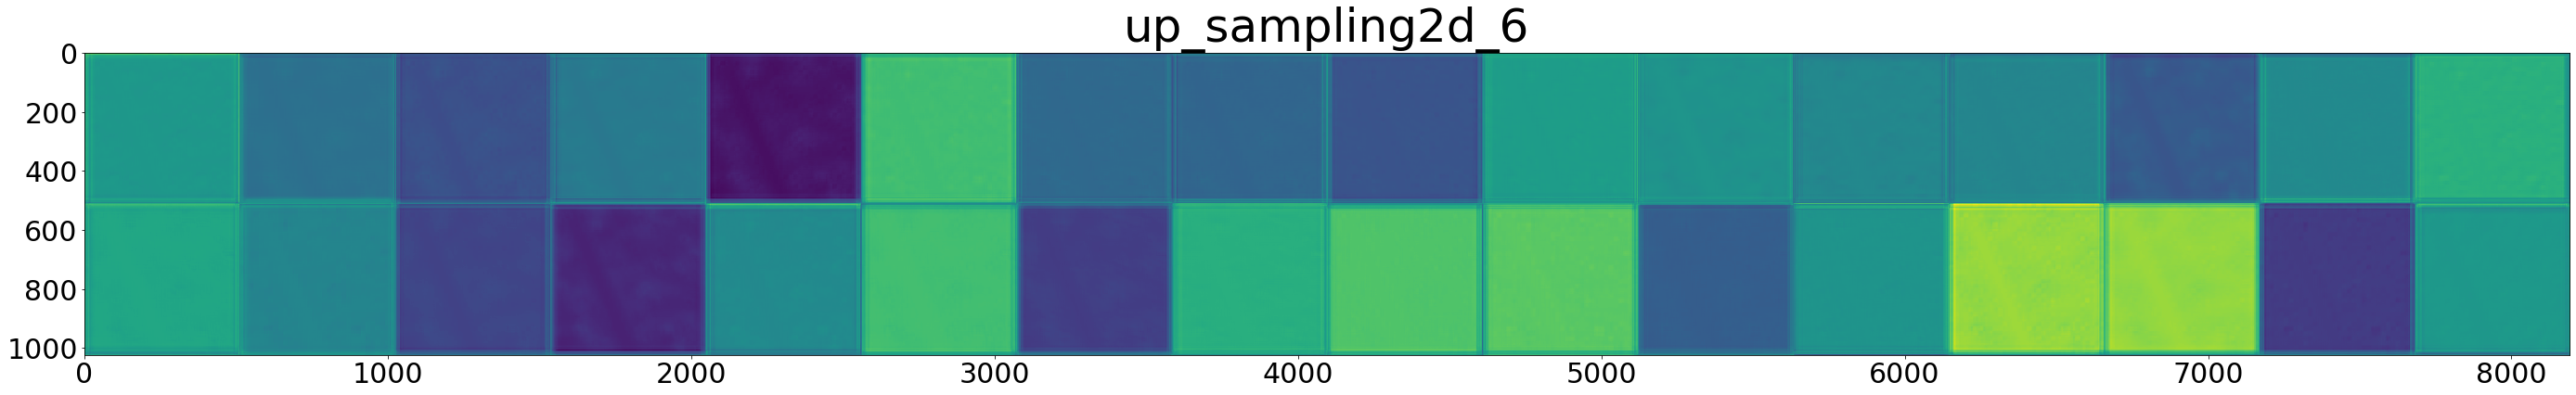

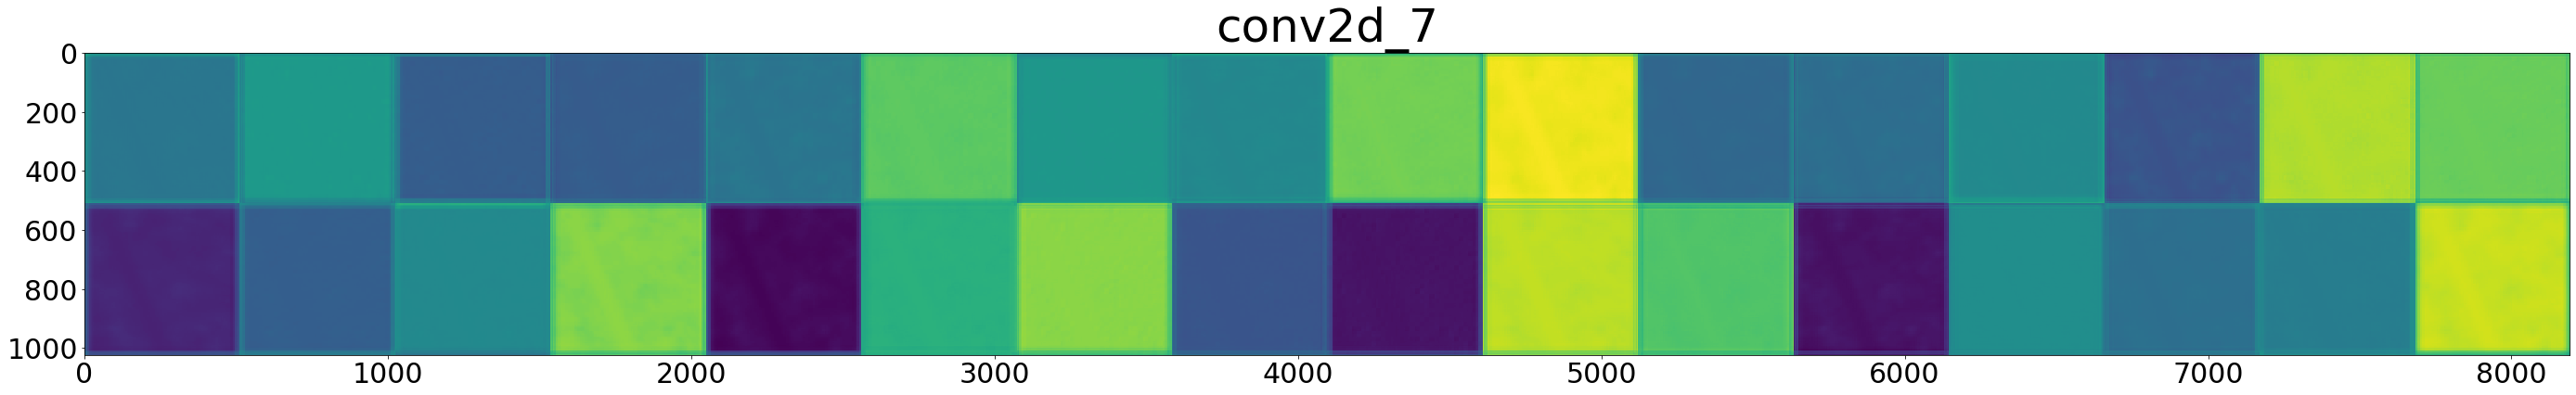

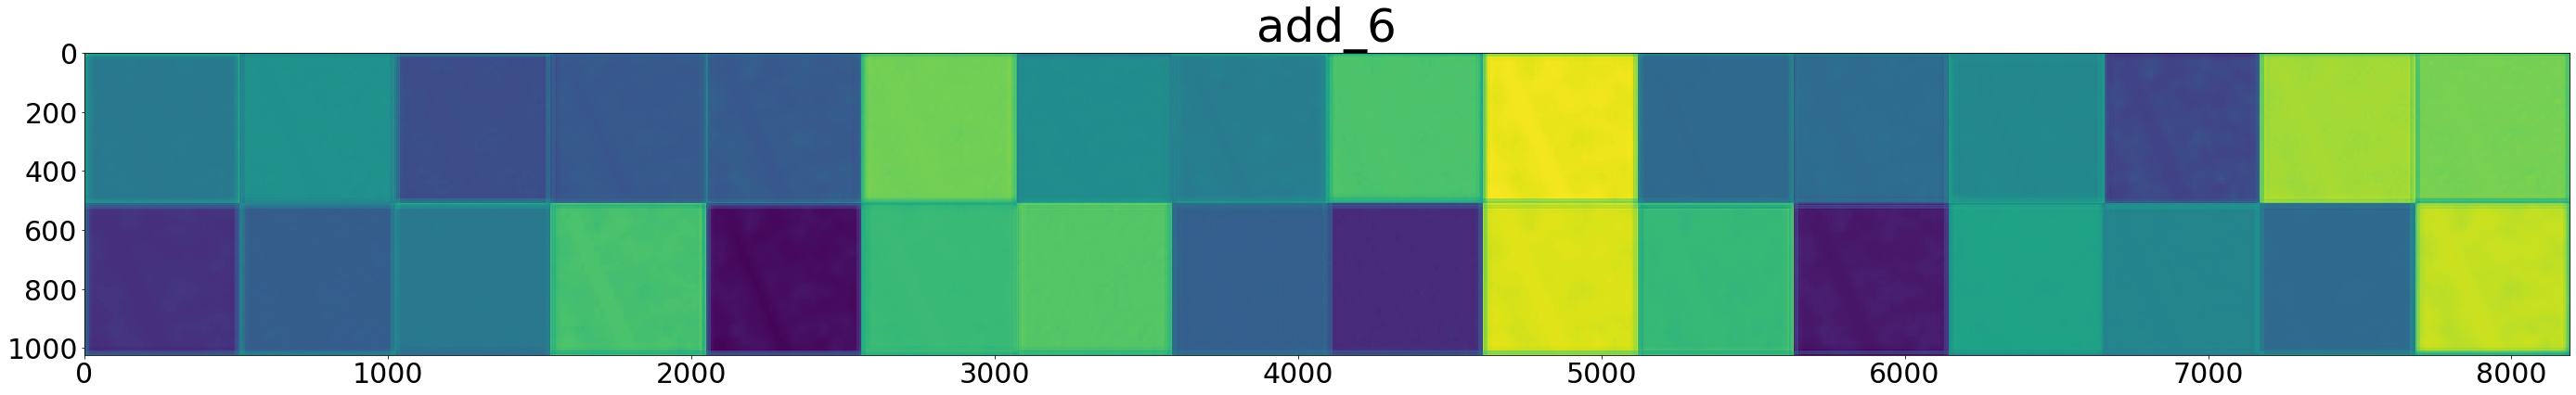

In [74]:
#warnings.filterwarnings(action="ignore" ,category=UserWarning)

# Extracts the outputs starting at x layer
x_layers = 56
x_range = 15
layer_names = []
for layer in activation_model.layers[x_layers:x_layers+x_range]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, temp_pred[x_layers:x_layers+x_range]): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    '''print("\n1~activation_shape " ,layer_activation.shape)
    print("n_features " ,n_features)
    print("size " ,size)
    print("n_cols " ,n_cols)
    print("display_grid " ,size * n_cols ," ; " ,images_per_row * size)
    print("2~layername " ,layer_name)'''
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            '''channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            #channel_image /= channel_image.std()
            channel_image *= 3
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')'''
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 3. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name,fontsize=50)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto' #,cmap='viridis'
              )

#warnings.filterwarnings(action='default')

In [ ]:
#how to overlay 2 channel predictions?

In [169]:
tempxx = np.load(datapath+'/image_file_14.npy')
tempxx = np.load(datapath+'/label_file_14.npy')
tempxx.shape

(32, 512, 512, 1)

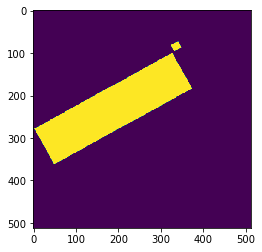

In [213]:
plt.imshow(tempxx[0,:,:,0])

<function matplotlib.pyplot.show(*args, **kw)>

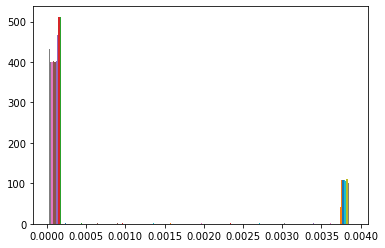

In [228]:
tempxx = np.load(datapath+'/label_file_14.npy')
rng = tempxx[0,:,:,0]
plt.hist(rng, bins='auto')
plt.show

In [222]:

unique_elements, counts_elements = np.unique((tempxx[0,:,:,0]) ,return_counts=True)
print(np.asarray((tempxx[0,:,:,0], counts_elements)))
print("\nFrequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
 array([225776,      1,      1, ...,      1,      1,  35346])]

Frequency of unique values of the said array:
[[0.00000000e+00 7.20379512e-06 8.93098240e-06 ... 3.91766243e-03
  3.91986361e-03 3.92156886e-03]
 [2.25776000e+05 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 3.53460000e+04]]


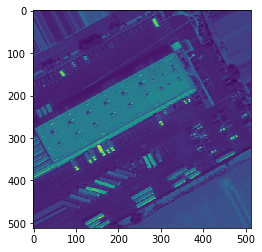

In [168]:
plt.imshow(tempxx[0,:,:,0])

In [ ]:
def Printthis(df ,ind=False ,elems=5 ,rows=10 ,columns=None ,rand=False ,prt=False):
    if prt == True:
        with pd.option_context('display.max_rows', None
                               , 'display.max_columns', None
                               ,'display.width', None
                              ,'display.max_colwidth', None):
            print (df)
    else:
        size = len(df)

        if ind==True:
            return index
        elif rand == False:
            with pd.option_context('display.max_rows', rows
                                   , 'display.max_columns', columns
                                   ,'display.width', None
                                  ,'display.max_colwidth', None):
                print (df.iloc[:rows])
        else:
            index = np.random.permutation(size)[:elems]
            with pd.option_context('display.max_rows', rows
                                   , 'display.max_columns', columns
                                   ,'display.width', None
                                  ,'display.max_colwidth', None):
                print (df.iloc[index])